In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

#打印模型结构
from keras.utils.vis_utils import plot_model

#可视化
import matplotlib.pylab as plt#导入绘图库
import pandas as pd

In [ ]:
"""加载数据"""
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
#加利福尼亚的房价数据
#总计20640个样本，每个样本8个属性表示，以及房价作为target，所有属性值均为number
#目标变量：平均房屋价值
#输入变量（特征）：平均收入、住房平均年龄、平均房间、平均卧室、人口、平均占用、纬度和经度

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, 
                                                              housing.target, 
                                                              random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
                                                      y_train_full,
                                                      random_state=42)

StandardScaler(): 针对每一个特征维度去均值和方差归一化，加快了梯度下降求最优解的速度，可能提升模型精度

In [ ]:
scaler = StandardScaler()

fit(): 求得训练集X的均值/方差等固有属性，可理解为一个训练过程

transform(): 在Fit的基础上，进行标准化，降维，归一化等操作（看具体用的是哪个工具，如PCA，StandardScaler等）

fit_transform():fit_transform是fit和transform的组合，既包括了训练又包含了转换。

In [ ]:
X_train = scaler.fit_transform(X_train)#求训练集的固有属性（均值方差等）,归一化转换
X_valid = scaler.transform(X_valid)#归一化转换验证集
X_test = scaler.transform(X_test)##归一化转换测试集

In [ ]:
X_train.shape
#10610个房价数据

(11610, 8)

In [ ]:
fetch_california_housing () ['DESCR']
#查看数据集属性

'California housing dataset.\n\nThe original database is available from StatLib\n\n    http://lib.stat.cmu.edu/datasets/\n\nThe data contains 20,640 observations on 9 variables.\n\nThis dataset contains the average house value as target variable\nand the following input variables (features): average income,\nhousing average age, average rooms, average bedrooms, population,\naverage occupation, latitude, and longitude in that order.\n\nReferences\n----------\n\nPace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,\nStatistics and Probability Letters, 33 (1997) 291-297.\n\n'

In [ ]:
class_names = ["average income","housing average age",
               "average rooms","average bedrooms",
               "population","average occupation",
               "latitude","longitude "]

In [ ]:
"""设置随机种子，使每次运行结果一样"""
np.random.seed(42)
tf.random.set_seed(42)

## 使用顺序API构建回归MLP

In [ ]:
model_1 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", 
                       input_shape=X_train.shape[1:]),
    #设置30个神经元的MLP层，输入所有训练集数据
    keras.layers.Dense(1)
    #回归输出层只有一个神经元且无激活函数
])

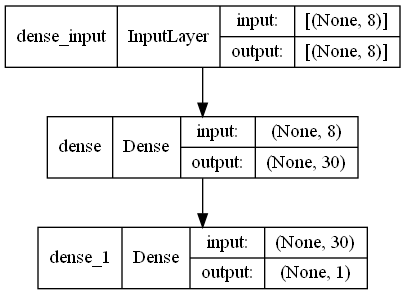

In [ ]:
keras.utils.plot_model(model_1,
                       show_shapes=True)

## 函数API构建复杂模型（像调用函数一样把隐藏层传递给输入）

非顺序神经网络将所有或部分输入直接连接到输出层，能学习深度模式（使用深度路径）和简单规则（使用短路径）

#### 多维数组切片

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train.shape[0:]
#x_train从索引0开始到以后的样本数目

(11610, 8)

In [ ]:
X_train.shape[0]#y_train（房价target）数据的个数

11610

In [ ]:
X_train.shape[1:]
#从数组索引 shape[1:] 处开始切割
#有8个属性

(8,)

In [ ]:
X_train.shape[1]#属性值

8

In [ ]:
X_train.shape[2:]

()

#### 单输入函数API模型

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
#创建一个Input对象，设置模型输入类型的规范（shape和的dtype等）
#也可设置成shape=8，输入单个样本的大小

hidden1 = keras.layers.Dense(30, activation="relu")(input_)
#像调用函数一样将创建好的hidden1传递给输入input_

hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
#将hidden2传递给输入hidden1

concat = keras.layers.concatenate([input_, hidden2])
#创建一个Concatenate层，合并输入input_和第二个隐藏层的输出hidden2

output = keras.layers.Dense(1)(concat)
#创建具有单个神经元且没有激活函数的输出层，将合并结果传递给他

model_2 = keras.models.Model(inputs=[input_], outputs=[output])
#创建一个Keras Model指定要使用的输入与输出
#与keras.models.Sequential()不同，注意大小写

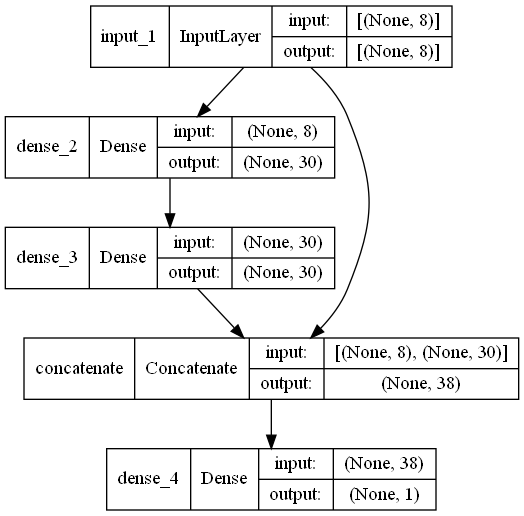

In [ ]:
keras.utils.plot_model(model_2,
                       show_shapes=True)

In [ ]:
#使用训练集的两个子集
X_train_A,X_train_B = X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B = X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B = X_test[:,:5],X_test[:,2:]

#### 多输入函数API模型

In [ ]:
"""宽路径送入5个特征（0-4）的子集X_train_A，深路径送入6个特征（2-7）的子集X_train_B"""
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)

model_3 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

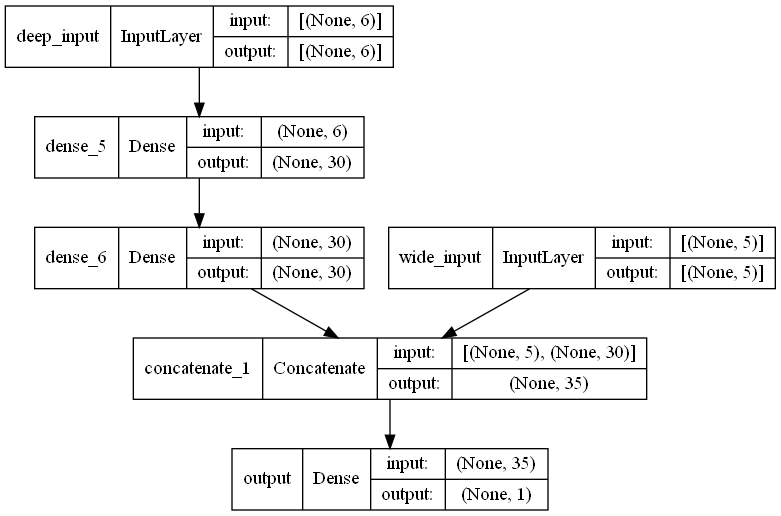

In [ ]:
keras.utils.plot_model(model_3,
                       show_shapes=True)

#### 多输出函数API模型

In [ ]:
"""将额外输出连接到适合的层，把它们添加到模型的输出列表"""
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)

aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
#辅助输出仅用于正则化

model_4 = keras.models.Model(inputs=[input_A, input_B], outputs=[output,aux_output])

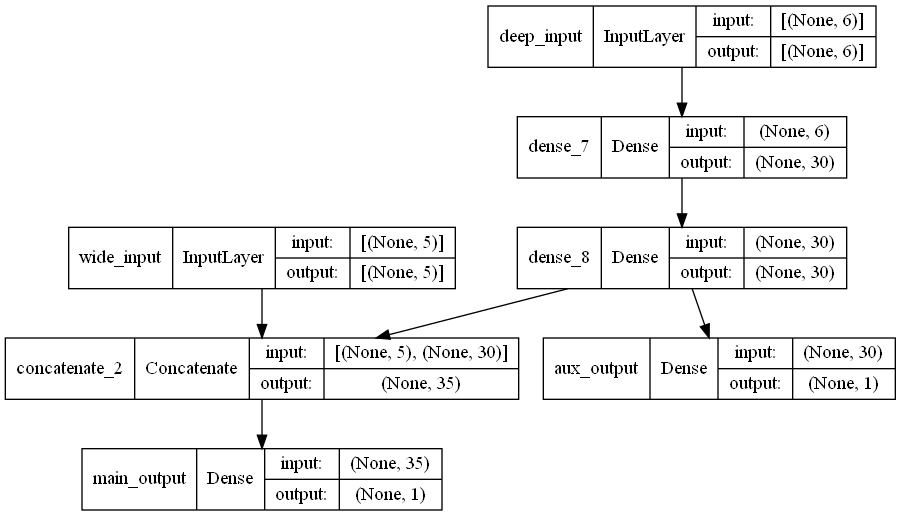

In [ ]:
keras.utils.plot_model(model_4,
                       show_shapes=True)

summary()：显示模型的所有层参数数量等

In [ ]:
"""Param表示每个层参数的个数,None表示批处理大小任意"""
#model_1.summary()

'Param表示每个层参数的个数,None表示批处理大小任意'

In [ ]:
#model_2.summary()

In [ ]:
#model_3.summary()

In [ ]:
model_4.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           930         ['dense_7[0][0]']                
                                                                                            

#### 编译模型compile()

In [ ]:
#回归问题使用均方误差
model_1.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

model_2.compile(loss="mse", 
                optimizer=keras.optimizers.SGD(learning_rate=1e-3)
                ,metrics=["accuracy"])

model_3.compile(loss="mse",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

#可设置主要输出和额外输出的损失权重（辅助权重只用于正则化，相对不重要）
#每个输出都需有自己的损失函数，若只传递单个则假定全部输出都使用相同损失
model_4.compile(loss=["mse","mse"],
                optimizer="sgd",
                metrics=["accuracy"],
                loss_weights=[0.9,0.1])

#### 输入训练集训练模型fit()，返回History对象

In [ ]:
history_1 = model_1.fit(X_train, y_train, 
                    epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6419 - accuracy: 0.0028 - val_loss: 0.8560 - val_accuracy: 0.0044
Epoch 2/20
363/363 [==============================] - 0s 872us/step - loss: 0.7047 - accuracy: 0.0029 - val_loss: 0.6531 - val_accuracy: 0.0044
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6345 - accuracy: 0.0029 - val_loss: 0.6099 - val_accuracy: 0.0044
Epoch 4/20
363/363 [==============================] - 0s 949us/step - loss: 0.5977 - accuracy: 0.0029 - val_loss: 0.5658 - val_accuracy: 0.0044
Epoch 5/20
363/363 [==============================] - 0s 894us/step - loss: 0.5706 - accuracy: 0.0029 - val_loss: 0.5355 - val_accuracy: 0.0044
Epoch 6/20
363/363 [==============================] - 0s 837us/step - loss: 0.5472 - accuracy: 0.0029 - val_loss: 0.5173 - val_accuracy: 0.0044
Epoch 7/20
363/363 [==============================] - 0s 820us/step - loss: 0.5288 - accuracy: 0.0029 - val_loss: 0.5081 - val_accuracy: 0.0

In [ ]:
history_2 = model_2.fit(X_train, y_train, 
                    epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8772 - accuracy: 0.0026 - val_loss: 0.6913 - val_accuracy: 0.0044
Epoch 2/20
363/363 [==============================] - 0s 902us/step - loss: 0.6501 - accuracy: 0.0029 - val_loss: 0.9454 - val_accuracy: 0.0044
Epoch 3/20
363/363 [==============================] - 0s 889us/step - loss: 0.6012 - accuracy: 0.0029 - val_loss: 0.6622 - val_accuracy: 0.0044
Epoch 4/20
363/363 [==============================] - 0s 913us/step - loss: 0.5654 - accuracy: 0.0029 - val_loss: 0.5284 - val_accuracy: 0.0044
Epoch 5/20
363/363 [==============================] - 0s 934us/step - loss: 0.5414 - accuracy: 0.0029 - val_loss: 0.5004 - val_accuracy: 0.0044
Epoch 6/20
363/363 [==============================] - 0s 927us/step - loss: 0.5181 - accuracy: 0.0029 - val_loss: 0.5894 - val_accuracy: 0.0044
Epoch 7/20
363/363 [==============================] - 0s 905us/step - loss: 0.5035 - accuracy: 0.0029 - val_loss: 0.5889 - val_accuracy: 0

In [ ]:
# history_3 = model_3.fit((X_train_A,X_train_B), y_train, 
#                     epochs=20, validation_data=((X_valid_A,X_valid_B), y_valid))

#或
history_3 = model_3.fit({"wide_input":X_train_A,"deep_input":X_train_B},
                        {"output":y_train},
                        epochs=20, validation_data=((X_valid_A,X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.0090 - accuracy: 0.0028 - val_loss: 0.9850 - val_accuracy: 0.0044
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7896 - accuracy: 0.0029 - val_loss: 0.7180 - val_accuracy: 0.0044
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6514 - accuracy: 0.0028 - val_loss: 0.6402 - val_accuracy: 0.0044
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5991 - accuracy: 0.0028 - val_loss: 0.5778 - val_accuracy: 0.0044
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5671 - accuracy: 0.0028 - val_loss: 0.5449 - val_accuracy: 0.0044
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5423 - accuracy: 0.0027 - val_loss: 0.5190 - val_accuracy: 0.0044
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5228 - accuracy: 0.0027 - val_loss: 0.5011 - val_accuracy: 0.0044
Epoch 

In [ ]:
#训练模型时需为每个输出提供标签
history_4 = model_4.fit({"wide_input":X_train_A,"deep_input":X_train_B},
                        {"main_output":y_train,"aux_output":y_train},
                        epochs=20, validation_data=((X_valid_A,X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9014 - main_output_loss: 0.7646 - aux_output_loss: 2.1322 - main_output_accuracy: 0.0028 - aux_output_accuracy: 0.0029 - val_loss: 2.2432 - val_main_output_loss: 2.3473 - val_aux_output_loss: 1.3063 - val_main_output_accuracy: 0.0044 - val_aux_output_accuracy: 0.0044
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5549 - main_output_loss: 0.4924 - aux_output_loss: 1.1172 - main_output_accuracy: 0.0027 - aux_output_accuracy: 0.0029 - val_loss: 7.4504 - val_main_output_loss: 8.1643 - val_aux_output_loss: 1.0256 - val_main_output_accuracy: 0.0044 - val_aux_output_accuracy: 0.0044
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5726 - main_output_loss: 0.5261 - aux_output_loss: 0.9914 - main_output_accuracy: 0.0027 - aux_output_accuracy: 0.0029 - val_loss: 0.5967 - val_main_output_loss: 0.4033 - val_aux_output_loss: 2.3374 - val_main_output_accuracy: 0.0044 - 

#### 评估模型evaluate()

In [ ]:
mse_test_1 = model_1.evaluate(X_test, y_test)

162/162 [==============================] - 0s 737us/step - loss: 0.4212 - accuracy: 0.0021


In [ ]:
mse_test_2 = model_2.evaluate(X_test, y_test)

162/162 [==============================] - 0s 738us/step - loss: 0.4164 - accuracy: 0.0021


In [ ]:
mse_test_3 = model_3.evaluate((X_test_A,X_test_B), y_test)

162/162 [==============================] - 0s 805us/step - loss: 0.4297 - accuracy: 0.0021


In [ ]:
mse_test_4 = model_4.evaluate((X_test_A,X_test_B), (y_test,y_test))

162/162 [==============================] - 0s 1ms/step - loss: 0.3673 - main_output_loss: 0.3545 - aux_output_loss: 0.4831 - main_output_accuracy: 0.0021 - aux_output_accuracy: 0.0021 


#### 保存顺序API和函数API的模型model.save()

In [ ]:
"""顺序API和函数API可使用HDF5 格式保存模型结构，直接保存训练好的Keras模型，
    子类化模型需在训练结束时自己保存模型，还需在训练过程中定期保存检查点"""
#使用HDF5格式保存模型的结构（包含每一层的超参数、
#所有模型参数值（包含连接权重和偏置等）、优化器（包含其超参数和可能具有的任何状态））
model_1.save("my_keras_model_1.h5")

#### 还原模型model.load_data()

In [ ]:
model = keras.models.load_model("my_keras_model_1.h5")

In [ ]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 622us/step - loss: 0.4212 - accuracy: 0.0021


#### 模型可视化

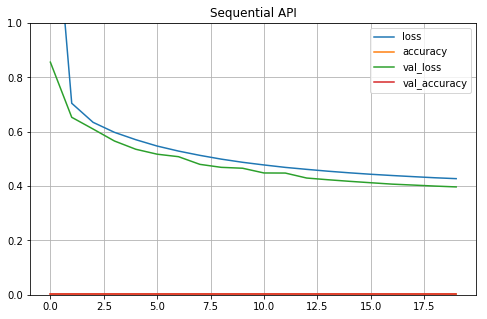

In [ ]:
#plt.plot(pd.DataFrame(history.history))
#没有每条线是什么参数的标注

pd.DataFrame(history_1.history).plot(figsize=(8, 5))

#fit（）返回的History对象包含训练参数history.params、经历的轮次列表history.epoch，
#包含在训练集和验证集上每个轮次结束时测得的损失和格外指标的字典history.history。
plt.grid(True)
plt.title('Sequential API')
plt.gca().set_ylim(0, 1)#设置纵坐标范围为0-1
plt.show()

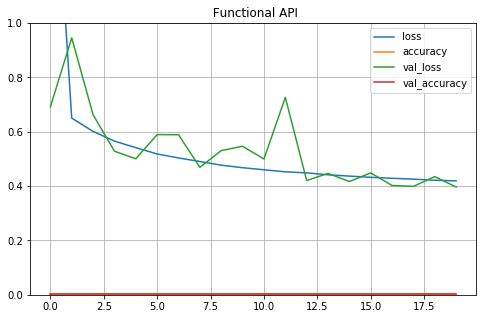

In [ ]:
pd.DataFrame(history_2.history).plot(figsize=(8, 5))

plt.grid(True)
plt.title(' Functional API')
plt.gca().set_ylim(0, 1)#设置纵坐标范围为0-1
plt.show()

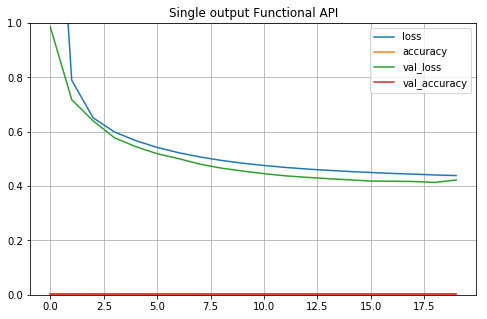

In [ ]:
pd.DataFrame(history_3.history).plot(figsize=(8, 5))

plt.grid(True)
plt.title('Single output Functional API')
plt.gca().set_ylim(0, 1)#设置纵坐标范围为0-1
plt.show()

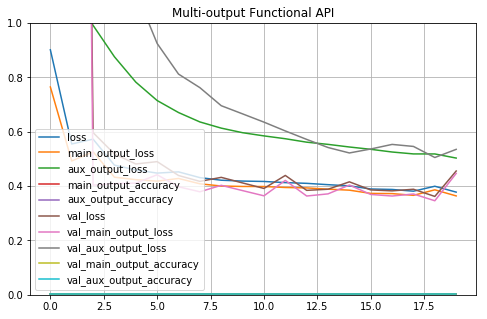

In [ ]:
pd.DataFrame(history_4.history).plot(figsize=(8, 5))

plt.grid(True)
plt.title('Multi-output Functional API')
plt.gca().set_ylim(0, 1)#设置纵坐标范围为0-1
plt.show()

#### 预测模型效果

In [ ]:
X_new = X_test[:3]
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [ ]:
X_new_A,X_new_B = X_test_A[:3],X_test_B[:3]
print(X_test_A[:3])
print(X_test_B[:3])

[[-1.15780104 -0.28673138 -0.49550877 -0.16618097 -0.02946012]
 [-0.7125531   0.10880952 -0.16332973  0.20164652  0.12842117]
 [-0.2156101   1.8491895  -0.57982788  0.18528489 -0.10429403]]
[[-0.49550877 -0.16618097 -0.02946012  0.38899735  0.19374821  0.2870474 ]
 [-0.16332973  0.20164652  0.12842117 -0.11818174 -0.23725261  0.06215231]
 [-0.57982788  0.18528489 -0.10429403 -0.67694905  1.00890193 -1.4271529 ]]


In [ ]:
y_pred_1 = model_1.predict(X_new)
y_pred_1

array([[0.38856643],
       [1.6792021 ],
       [3.1022794 ]], dtype=float32)

In [ ]:
y_pred_2 = model_2.predict(X_new)
y_pred_2

array([[0.43742684],
       [1.725744  ],
       [3.4477878 ]], dtype=float32)

In [ ]:
y_pred_3 = model_3.predict((X_new_A,X_new_B))
y_pred_3

array([[0.5426421],
       [1.9104328],
       [3.2765098]], dtype=float32)

In [ ]:
y_pred_main_4,y_pred_aux_4 = model_4.predict((X_new_A,X_new_B))
y_pred_main_4

array([[0.57737625],
       [1.660349  ],
       [3.465272  ]], dtype=float32)

In [ ]:
y_pred_aux_4

array([[0.96942735],
       [1.9277482 ],
       [2.9906895 ]], dtype=float32)